In [138]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [140]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'fare')

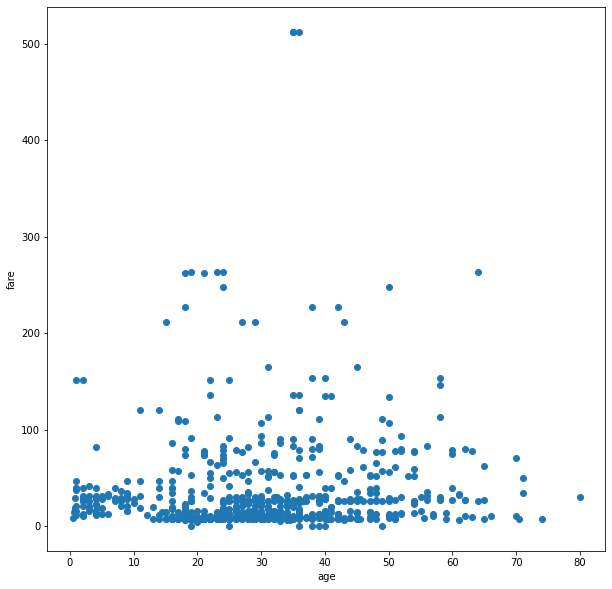

In [141]:
plt.figure(figsize=(10,10))
plt.scatter(train.iloc[:,5],train.iloc[:,9])
plt.xlabel('age')
plt.ylabel('fare')

In [142]:
train.dropna(inplace=True)

In [143]:
train=train.drop(['Name','Cabin','Ticket'],axis=1)

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train['Embarked']=le.fit_transform(train['Embarked'])
train['Sex']=le.fit_transform(train['Sex'])

X_std=StandardScaler().fit_transform(train)

In [132]:
test=test.drop(['Name','Cabin','Ticket'],axis=1)

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
test['Embarked']=le.fit_transform(test['Embarked'])
test['Sex']=le.fit_transform(test['Sex'])

X_std=StandardScaler().fit_transform(test)

In [144]:
X_std

array([[-1.84013507,  0.6984303 , -0.37225618, ..., -0.63172982,
        -0.0971798 , -1.33939713],
       [-1.83201742,  0.6984303 , -0.37225618, ..., -0.63172982,
        -0.3359971 ,  0.75555735],
       [-1.81984093, -1.43178211, -0.37225618, ..., -0.63172982,
        -0.35225028,  0.75555735],
       ...,
       [ 1.72351585,  0.6984303 , -0.37225618, ...,  0.69708118,
         0.05878503, -1.33939713],
       [ 1.75598648,  0.6984303 , -0.37225618, ..., -0.63172982,
        -0.63938976,  0.75555735],
       [ 1.76410413,  0.6984303 , -0.37225618, ..., -0.63172982,
        -0.63938976, -1.33939713]])

In [145]:
km=KMeans(n_clusters=2)

In [146]:
km.fit(X_std)

KMeans(n_clusters=2)

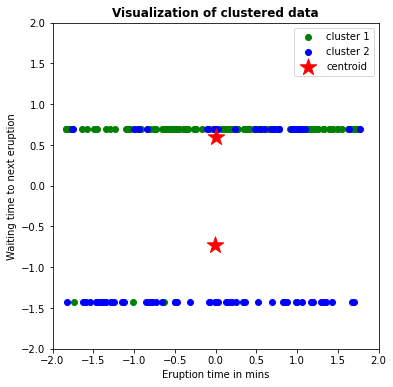

In [148]:
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');